# 0.) Import and Clean data

In [4]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

In [6]:
df = pd.read_csv("/content/Country-data.csv", sep = ",")

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [10]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [11]:
kmeans = KMeans(n_clusters= 5
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [12]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

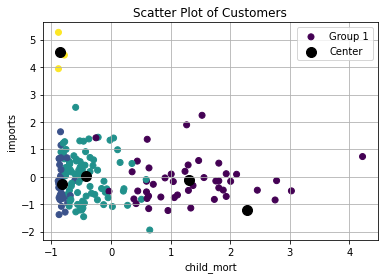

In [13]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 3


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [14]:
WCSs = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters= k , n_init=30)
  kmeans.fit(X_scaled)
  WCSs.append(kmeans.inertia_)


# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

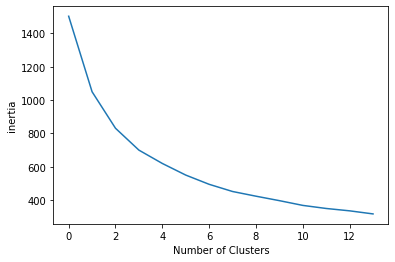

In [16]:
plt.plot(WCSs)
plt.xlabel("Number of Clusters")
plt.ylabel("inertia")
plt.show()

In [18]:
#use economic thinking to find good number of clusters

#It looks like 10 adequately is a good troph point for the inertia metric
k = 10
kmeans = KMeans(n_clusters=k).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [21]:
preds = pd.DataFrame(kmeans.predict(X_scaled))
output = pd.concat([preds,names],axis=1)
print("Cluster 1:")
list(output[output[0] == 1]["country"])

Cluster 1:


['Albania',
 'Argentina',
 'Bahamas',
 'Barbados',
 'Bosnia and Herzegovina',
 'Brazil',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Ecuador',
 'El Salvador',
 'Georgia',
 'Greece',
 'Grenada',
 'Israel',
 'Montenegro',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Turkey',
 'Uruguay']

FINDINGS: I'm finding that the first couple clusters were 3rd world countries while many of the other clusters were 1st or 2nd world countries

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [23]:
Q6df = pd.concat([preds,X],axis=1)

In [24]:
Q6df.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,50.900000,38.408333,9.159167,72.825000,4895.833333,5.877500,61.241667,3.235833,2691.083333
1,12.095652,29.395652,8.362174,37.682609,16344.782609,4.441957,76.434783,1.892174,11676.086957
2,105.070370,23.589630,6.507037,39.662963,1589.740741,7.142778,57.248148,5.433704,667.888889
3,4.320000,42.490000,10.644000,38.935000,42030.000000,1.380850,80.945000,1.787500,48230.000000
4,13.245161,60.319355,6.341613,62.764516,17807.096774,4.083677,74.816129,1.945806,10222.580645
5,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
6,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000
7,36.065625,27.852469,4.533437,34.908309,7919.062500,9.272531,70.321875,2.757812,3444.937500
8,11.050000,64.900000,3.000000,36.666667,71516.666667,13.363333,77.083333,2.308333,36283.333333


In [25]:
Q6df.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,24.268985,13.967915,2.848759,19.939870,4176.023464,2.924343,6.561521,0.936147,2339.078508
1,6.005791,7.890298,1.621369,12.856397,6578.631296,4.675264,2.574633,0.428177,8105.265258
2,33.987914,10.359610,2.358064,9.555753,650.612114,5.423793,6.540076,0.834530,304.547121
3,1.137217,22.922568,2.003369,18.844021,7319.196102,2.139968,1.025196,0.271388,13227.487330
4,8.677897,14.282423,1.438453,13.229425,9042.984829,4.714769,3.302736,0.572869,7157.727744
5,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,19.915817,14.775931,1.268628,14.883681,5274.692077,5.686844,3.857354,0.765379,2422.976841
8,2.554016,9.108458,0.863852,14.417582,30065.290065,3.925005,1.570244,0.500536,18662.949035


# Q7.) Write an observation about the descriptive statistics.

In [ ]:
#I find that the countries with a higher GDPp have a higher life expectancy but imports do no correlate. 